# Author : Nitin Sahu(Intern at The Sparks Foundation)
### Data Science and Business Analyst
## Task-2 : Prediction Using Unsupervised Machine Learning
### Problem Statement : 
#### In this task , we need to predict the optimum number of clusters for the Iris datasets by using K-Means classification and represent it graphically.
### Data Description :
#### Dataset consist of six columns which represents Id, Sepal length , Sepal width , Petal length and  Petal width. 
### K-Means Clustering :
#### KMeans algorithm is an iterative algorithm that tries to partition the datasets into K pre-defined distnict non-overlapping subgroups, then tries to allocate every datapoints into its nearest cluster while keeping the centeriod as small as possible. 

### Step-1 : Importing the libraries

In [8]:
import pandas as pd 
import numpy as nm
import matplotlib.pyplot as plt
from sklearn import datasets

### Step-2 : Load the Iris datasets 

In [9]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns =iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Step-3 : Finding the optimum number of cluster for K-Means algorithm 

#### We need to find number of cluster before performing K-Means clustering.There are  number of methods like Silhouette cofficient , Elbow method and Gap Statistic method. Here we are considering the Elbow method.
## Elbow method : 
#### In this method, the number of cluster varies within a certain range. For each datapoint, Within Cluster Sum Of Squares(WCSS) is calculated and stored in the list.These values are then plotted against the number of cluster and picking the optimum elbow from which the standard deviation is not changing much.

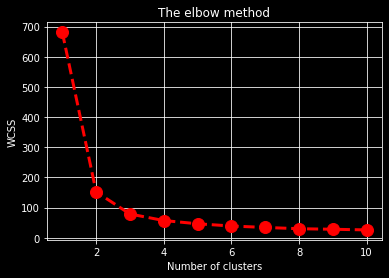

In [36]:
X = iris_df.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
   kmeans = KMeans(n_clusters= i, init= 'k-means++', n_init= 10, max_iter= 300,random_state= 0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)

# plotting the results onto line graph
# allow us to observe 'The Elbow'
with plt.style.context('dark_background'):
 plt.plot(range(1,11),wcss,color='red', marker='o', linestyle='dashed', linewidth=3, markersize=12)
 plt.title('The elbow method')
 plt.xlabel('Number of clusters')
 plt.ylabel('WCSS')
 plt.grid()
plt.show()

In [23]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### As we can see from the above output whole dataset is divided into 3 cluster.

## Step- 4 : Visualizing the Clusters

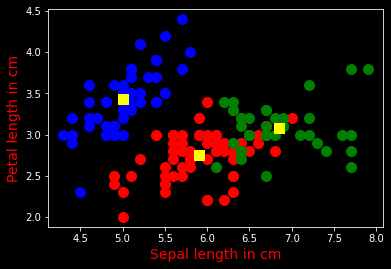

In [33]:
# Visualising the clusters - On the first two columns
with plt.style.context('dark_background'):
 plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
 s = 100, c = 'red', label = 'Iris-setosa')
 plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
 s = 100, c = 'blue', label = 'Iris-versicolour')
 plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
 s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
 plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], marker ='s', 
 s = 100, c = 'yellow', label = 'Centroids')
 plt.xlabel('Sepal length in cm',fontsize=14, color='red')
 plt.ylabel('Petal length in cm',fontsize=14, color='red')
plt.show()    

## Successfully clustered the Iris dataset using unsupervised machine learning. 